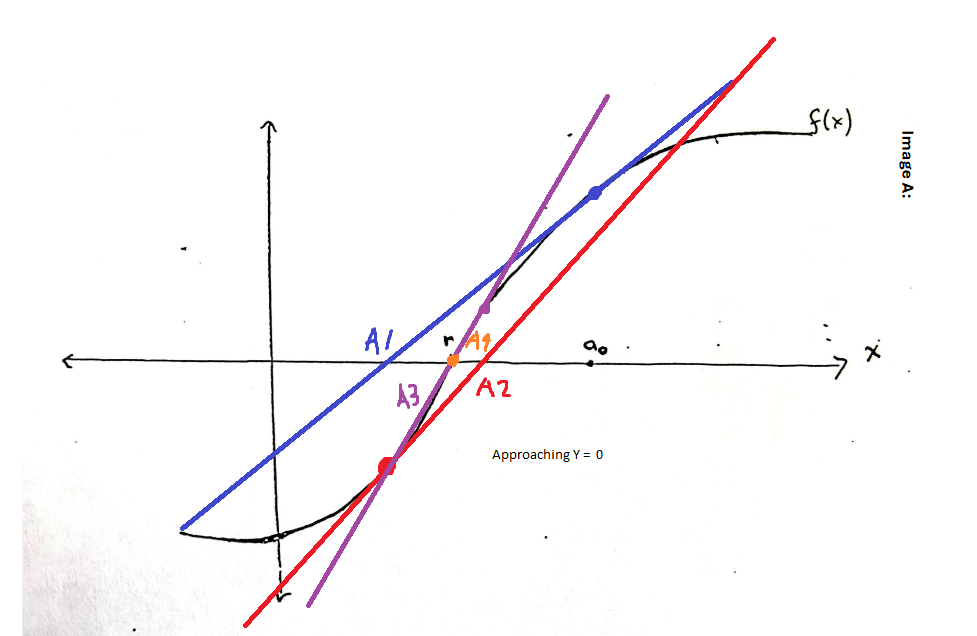
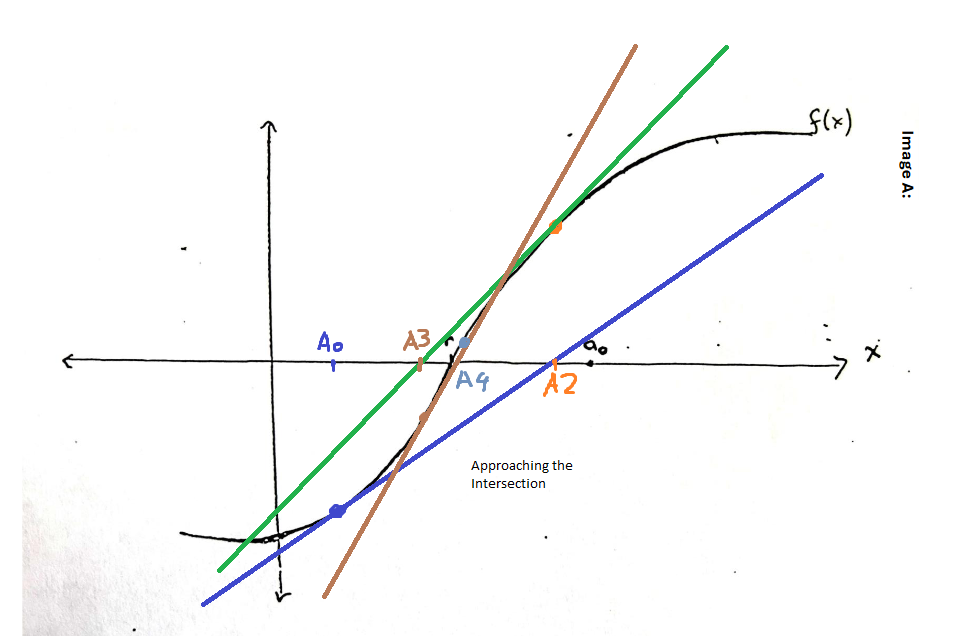
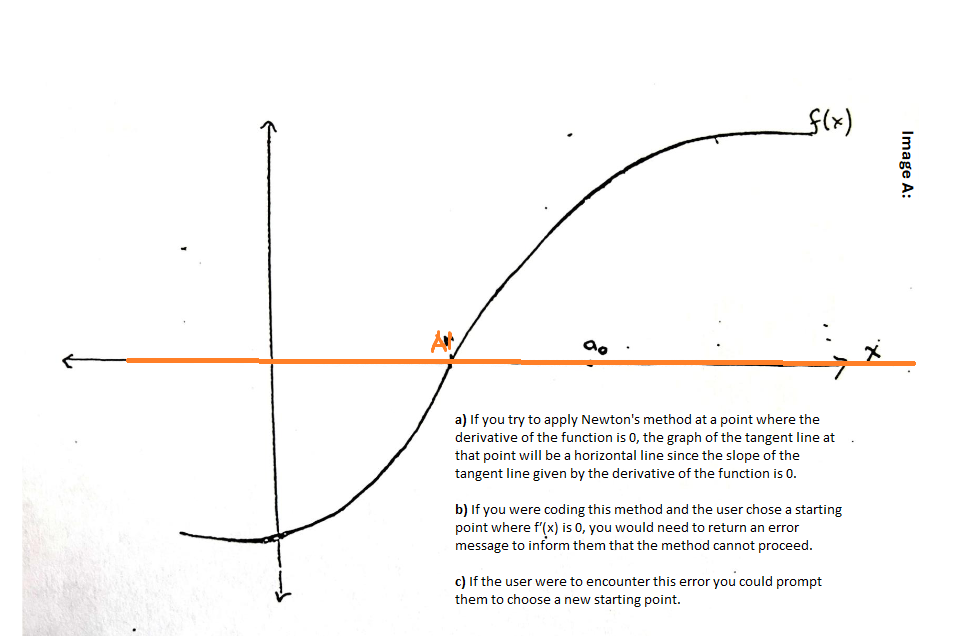
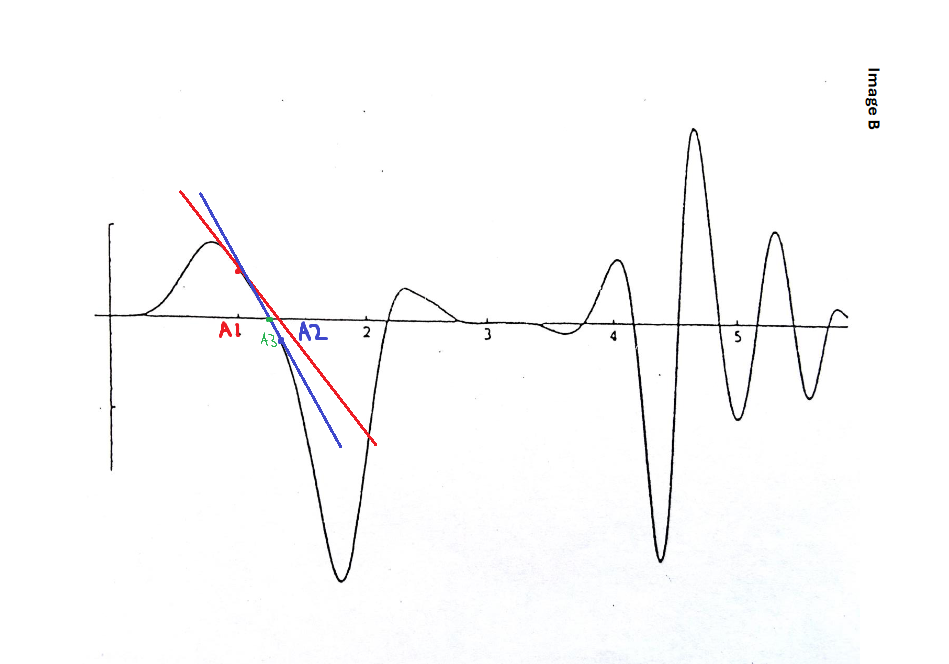
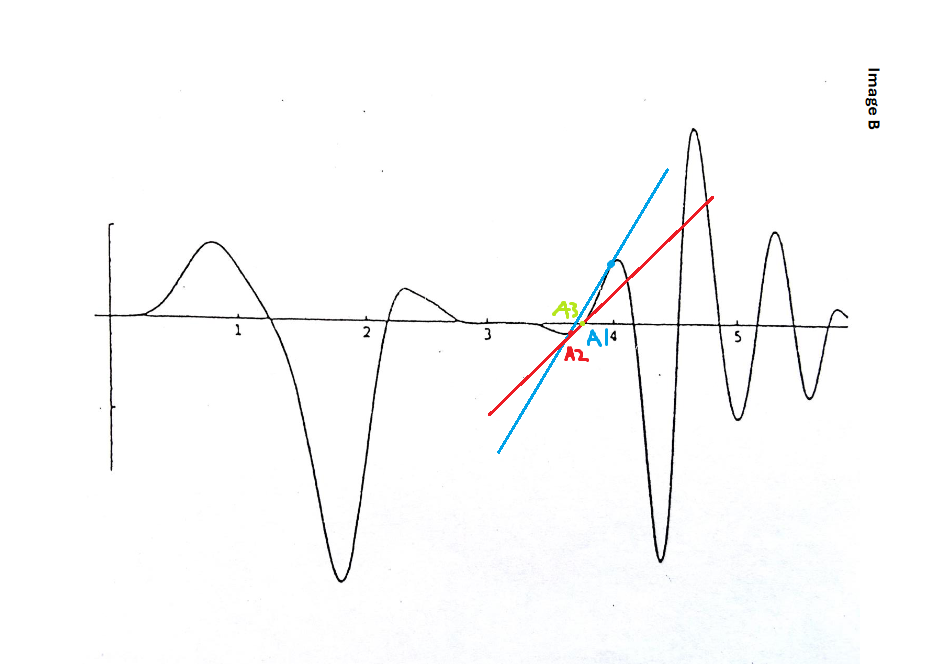
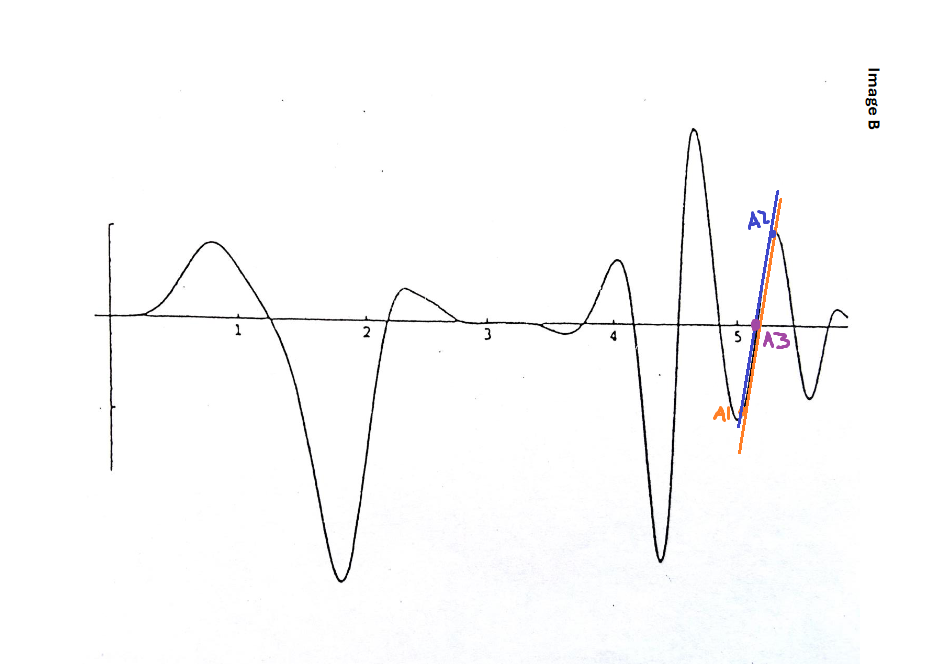




In [4]:
# Defining the function and its derivative
def f(x):
    return (x**2) / 4 + x / 4 - 5

def df(x):
    return x / 2 + 1 / 4

# Newton's Method
def newtons_method(f, df, x0, tol=1e-5, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            return x  # Found a root
        if dfx == 0:
            return f"Error: Derivative zero at iteration {i}. Cannot continue."
        x = x - fx / dfx
    return f"Error: Max iterations reached. No root found."

# Test for roots 4 and -5
roots = []
inputs = [2, -6, 5, -3, 4]  # Start with some guesses
for inp in inputs:
    root = newtons_method(f, df, inp)
    roots.append((inp, root))

roots

[(2, 4.000000017748179),
 (-6, -5.000000090000001),
 (5, 4.000000090000001),
 (-3, -5.000000017748179),
 (4, 4)]

### 6a) 
It is able to find the roots.

### 6b) 
Using the inputs (2, -6, 5, -3, and 4), it took 4 different guesses to find both roots consistently.

### 7)
A starting value where the derivative is zero will result in an error. For this function we tested, the derivative will be 0 at x = -1/2

In [2]:
# Test the case where the derivative is zero (x = -1/2)
error_start_value = newtons_method(f, df, -0.5)
error_start_value

'Error: Derivative zero at iteration 0. Cannot continue.'

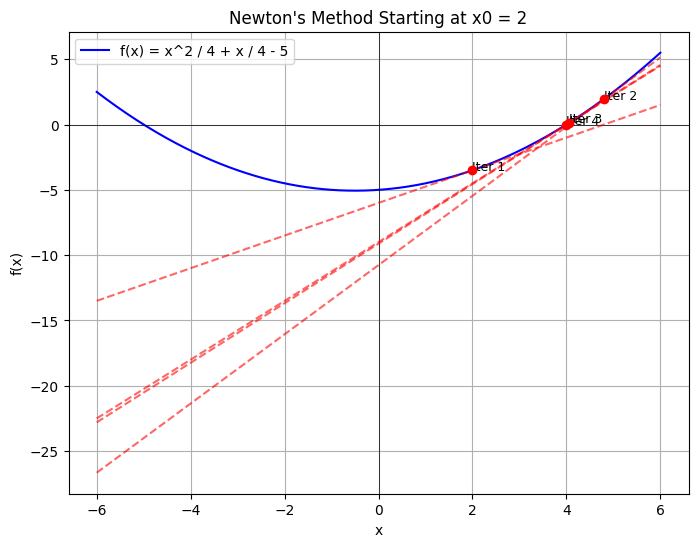

In [5]:
# Plotting the function
import numpy as np
import matplotlib.pyplot as plt

def plot_newtons_method(f, df, x0, max_iter=5):
    x_vals = np.linspace(-6, 6, 400)
    y_vals = f(x_vals)

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, label='f(x) = x^2 / 4 + x / 4 - 5', color='blue')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if dfx == 0 or abs(fx) < 1e-5:
            break

        # Draw the tangent line
        tangent_slope = dfx
        tangent_line = tangent_slope * (x_vals - x) + fx
        plt.plot(x_vals, tangent_line, '--', color='red', alpha=0.6)
        plt.scatter(x, fx, color='red', zorder=5)
        plt.text(x, fx, f'Iter {i+1}', fontsize=9)
        
        # Update for next iteration
        x = x - fx / dfx

    plt.title(f"Newton's Method Starting at x0 = {x0}")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Demonstrate Newton's method starting from x = 2 (for root at 4)
plot_newtons_method(f, df, 2, max_iter=5)

### Heatmap that shows how many iterations Newton's Method takes to converge

I got the idea to do this off of a Piazza post.

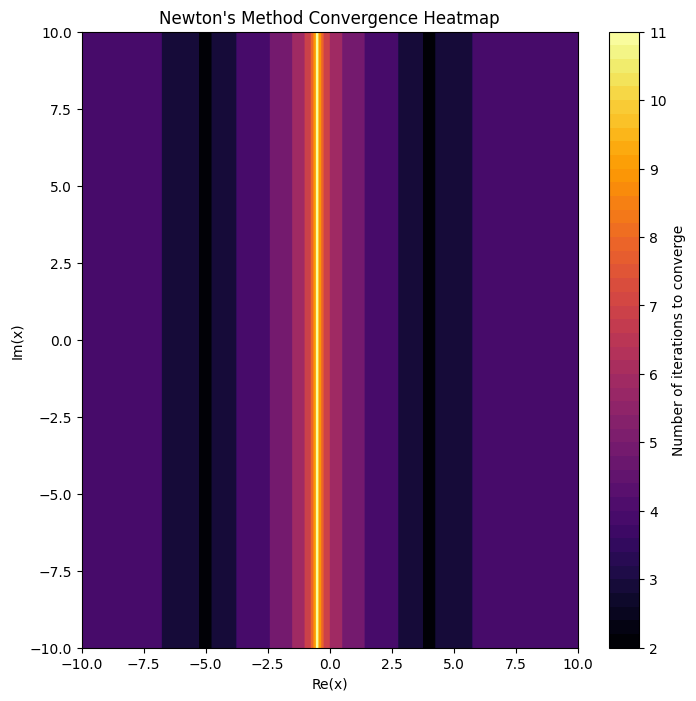

In [6]:
# Generate a grid of starting values
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Newton's method for a grid of starting points, counting iterations
def newtons_method_heatmap(f, df, x0, y0, tol=1e-5, max_iter=100):
    z = x0 + 1j * y0
    for i in range(max_iter):
        fz = f(z.real)
        dfz = df(z.real)
        if abs(fz) < tol:
            return i  # Number of iterations to converge
        if dfz == 0:
            return max_iter  # Treat zero derivative as max iterations
        z = z - fz / dfz
    return max_iter  # Max iterations reached without convergence

# Apply the method over the grid
iterations_grid = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        iterations_grid[i, j] = newtons_method_heatmap(f, df, X[i, j], Y[i, j])

plt.figure(figsize=(8, 8))
plt.contourf(X, Y, iterations_grid, levels=50, cmap='inferno')
plt.colorbar(label='Number of iterations to converge')
plt.title("Newton's Method Convergence Heatmap")
plt.xlabel('Re(x)')
plt.ylabel('Im(x)')
plt.show()